In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats 
import seaborn as sns
import os
import networkx as nx

Completos

In [138]:
pathSeries='/home/eric/Documents/TimeSeries/physionetDataset/SeriesPhysionet/Sanos/Completos/Series/'
X=os.listdir(pathSeries)
X.sort()
sanosSeriesC= [i for i in X if i[-1]=='t']

In [139]:
pathGraph='/home/eric/Documents/TimeSeries/Visibility/SanosCompletos/'
X=os.listdir(pathGraph)
X.sort()
sanosGraphC= X

In [140]:
serie=np.loadtxt(pathSeries+sanosSeriesC[0])
serie=serie[:,1]

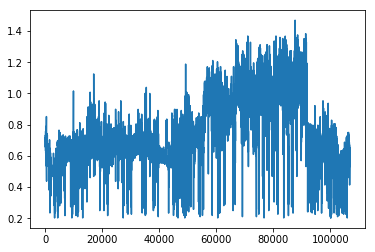

In [75]:
plt.plot(serie)

In [ ]:
deg=[G.degree(i) for i in G.nodes()]

In [141]:
G=nx.read_edgelist(pathGraph+sanosGraphC[0])
try:
    G.remove_node('source')
    G.remove_node('target')
except:
    pass

In [26]:
deg=[G.degree(i) for i in G.nodes()]

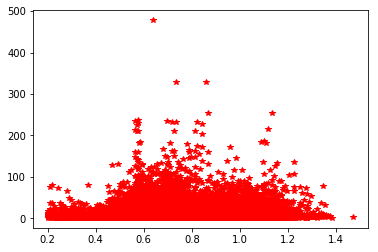

In [27]:
plt.plot(serie,deg,'*r')

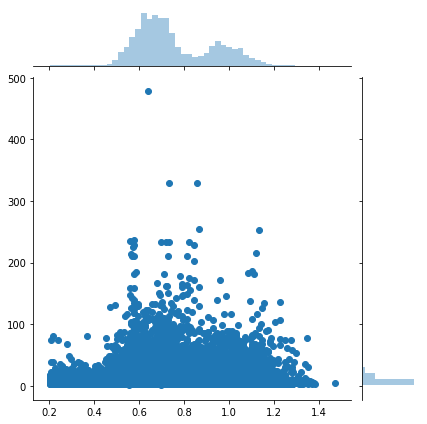

In [28]:
# fig=plt.figure()
# axes=fig.add_axes([0.1,0.1,2,2])
p1=sns.jointplot(x=serie, y=deg, kind='scatter')

In [30]:
slope, intercept, r_value, p_value, std_err = stats.linregress(serie,deg)

In [31]:
x=np.linspace(0.2,1.5,1000)
y=slope*x+intercept

Text(0, 0.5, 'Magnidute')

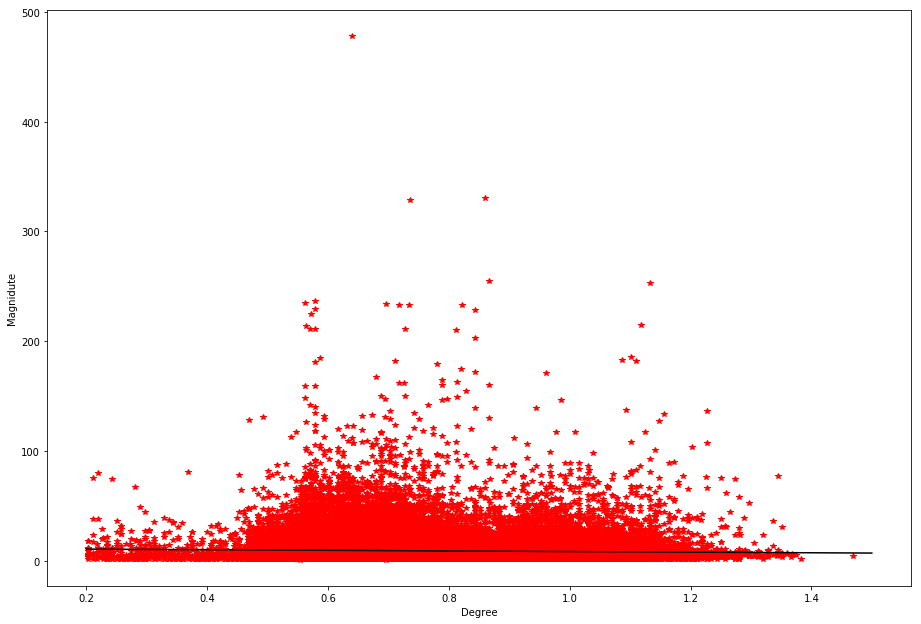

In [32]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])
p1 = axes.plot(serie,deg,'*r')
p1 = axes.plot(x,y,'-k')
plt.xlabel('Degree')
plt.ylabel('Magnidute')

(array([5.5000e+01, 5.5000e+01, 6.5000e+01, 5.7000e+01, 5.0000e+01,
        5.2000e+01, 7.4000e+01, 9.2000e+01, 5.2000e+02, 1.7630e+03,
        3.2170e+03, 6.2590e+03, 8.6330e+03, 9.7090e+03, 1.1400e+04,
        1.1488e+04, 9.1550e+03, 6.2580e+03, 3.6760e+03, 2.4390e+03,
        1.9030e+03, 2.7400e+03, 3.7910e+03, 4.8060e+03, 4.8230e+03,
        4.0750e+03, 3.3310e+03, 2.5990e+03, 1.7060e+03, 1.0160e+03,
        4.8100e+02, 2.5500e+02, 1.3500e+02, 8.2000e+01, 3.6000e+01,
        1.8000e+01, 1.7000e+01, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.203  , 0.23465, 0.2663 , 0.29795, 0.3296 , 0.36125, 0.3929 ,
        0.42455, 0.4562 , 0.48785, 0.5195 , 0.55115, 0.5828 , 0.61445,
        0.6461 , 0.67775, 0.7094 , 0.74105, 0.7727 , 0.80435, 0.836  ,
        0.86765, 0.8993 , 0.93095, 0.9626 , 0.99425, 1.0259 , 1.05755,
        1.0892 , 1.12085, 1.1525 , 1.18415, 1.2158 , 1.24745, 1.2791 ,
        1.31075, 1.3424 , 1.37405, 1.4057 , 1.43735, 1.469  ]),
 <a list of 40 Patch objects>)

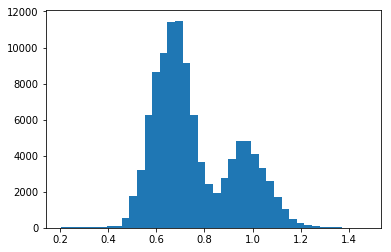

In [33]:
plt.hist(serie,bins=40)

In [77]:
pathSeries='/home/eric/Documents/TimeSeries/physionetDataset/SeriesPhysionet/Sanos/Dormidos y Despiertos/Series/'
X=os.listdir(pathSeries)
X.sort()
sanosSeriesC= [i for i in X if i[-1]=='t']

In [85]:
pathGraph='/home/eric/Documents/TimeSeries/Visibility/SanosDormidos/'
X=os.listdir(pathGraph)
X.sort()
sanosGraphC= X

In [130]:
serie=np.loadtxt(pathSeries+sanosSeriesC[0])
# serie=serie[:,1]

In [123]:
G2=nx.read_edgelist(pathGraph+sanosGraphC[0])
try:
    G2.remove_node('source')
    G2.remove_node('target')
except:
    pass

In [131]:
G2 = SerieToNetMod(serie)

In [132]:
deg=[G2.degree(i) for i in G2.nodes()]

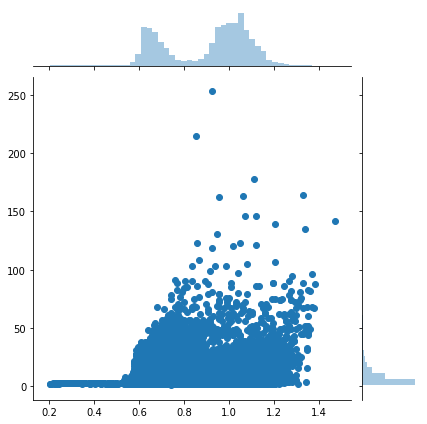

In [133]:
p1=sns.jointplot(x=serie, y=deg, kind='scatter')

In [134]:
slope, intercept, r_value, p_value, std_err = stats.linregress(serie,deg)

In [135]:
x=np.linspace(0.2,1.5,1000)
y=slope*x+intercept

Text(0, 0.5, 'Magnidute')

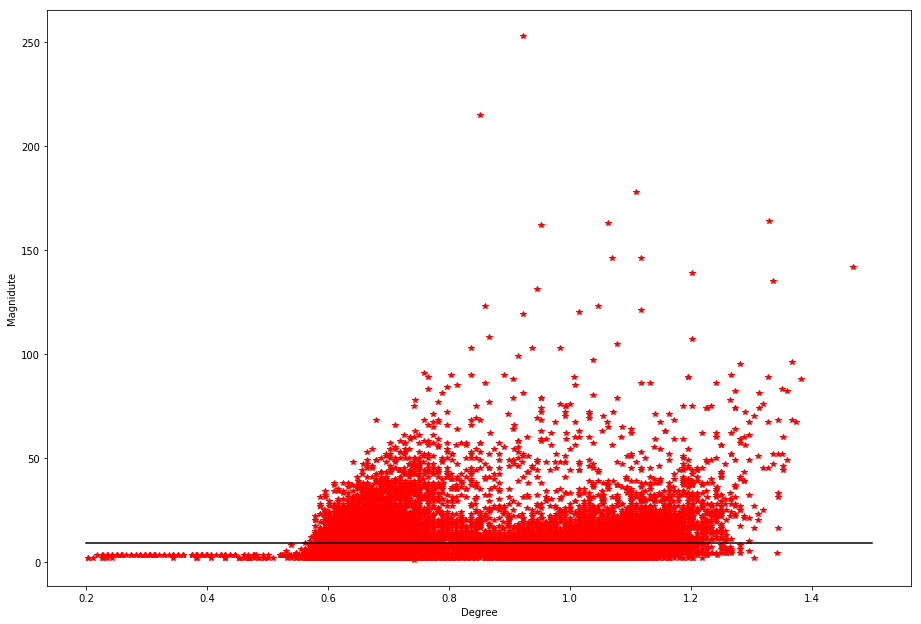

In [136]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])
p1 = axes.plot(serie,deg,'*r')
p1 = axes.plot(x,y,'-k')
plt.xlabel('Degree')
plt.ylabel('Magnidute')

In [137]:
slope

0.03393075418758509

/home/eric/anaconda3/envs/tesina/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


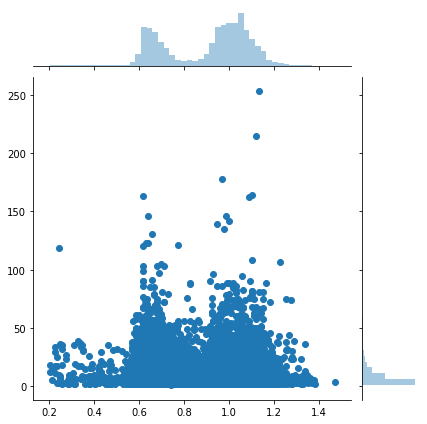

In [48]:
p1=sns.jointplot(x=serie, y=deg, kind='scatter')

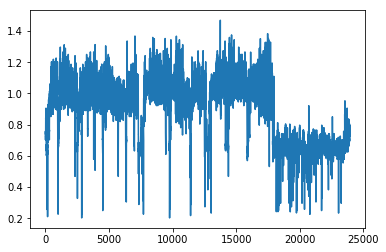

In [49]:
plt.plot(serie)

In [52]:
np.argmax(serie)

13748

In [53]:
deg[13748]

4

## Test

In [56]:
def SerieToNetMod(serie):
    arrG1=[]
    G=nx.Graph()
    for Na in range (len(serie)):
        ya=serie[Na]
        maxslp=-1000
        for Nb in range(Na+1,len(serie)):
#             print(Na,Nb,Na-Nb)
            yb=serie[Nb]
            slp=(yb-ya)/(Nb-Na)
            if slp > maxslp:
                arrG1.append((Na,Nb))
                maxslp=slp
                
    
    for i in range(len(serie)):
        G.add_node(i, y=serie[i])
                                    
    G.add_edges_from(arrG1)
    
    return(G)

In [ ]:
s = np.random.randint(1,10,10)

In [ ]:
gs=SerieToNetMod(s)

In [ ]:
plt.stem(s)

In [ ]:
gs.degree()

In [ ]:
degs=[gs.degree(i) for i in gs.nodes()]

In [ ]:
degs

In [9]:
plt.plot(s,degs,'*r')

NameError: name 's' is not defined

# Sanos Completos

In [10]:
lst=[]

In [11]:
for i in range(len(sanosSeriesC)):
    
    serie = np.loadtxt(pathSeries+sanosSeriesC[i])
    dic = {}
    
    try:
        serie = serie[:,1]
    except:
        pass
    
    G = nx.read_edgelist(pathGraph+sanosGraphC[i])
    try:
        G.remove_node('source')
        G.remove_node('target')
    except:
        pass
    
    deg = [G.degree(i) for i in G.nodes()]
    slope, intercept, r_value, p_value, std_err = stats.linregress(serie,deg)
    name = sanosSeriesC[i][:6]
    
    dic['name'] = name
    dic['slope'] = slope
    dic['intercept'] = intercept
    dic['r_value'] = r_value
    
    lst.append(dic)
    

In [12]:
dfSanosCOmpletos = pd.DataFrame(lst)

In [13]:
dfSanosCOmpletos.head()

,intercept,name,r_value,slope
0,11.124415,nsr01a,-0.045705,-2.772187
1,11.579127,nsr02a,-0.016360,-1.574864
2,14.109072,nsr03a,-0.061335,-7.336812
3,15.157336,nsr04a,-0.123617,-7.200928
4,7.426787,nsr05a,0.032516,1.937957


# Congestivos Completos

In [14]:
pathSeriesC='/home/eric/Documents/TimeSeries/physionetDataset/SeriesPhysionet/Congestivos/CHF01/Completos/Series/'
X=os.listdir(pathSeriesC)
X.sort()
congestivosSeriesC= [i for i in X if i[-1]=='t']

In [15]:
pathSeriesC2='/home/eric/Documents/TimeSeries/physionetDataset/SeriesPhysionet/Congestivos/CHF02/Completos/Series/'
X=os.listdir(pathSeriesC2)
X.sort()
congestivosSeriesC2= [i for i in X if i[-1]=='t']

In [16]:
pathGraphC='/home/eric/Documents/TimeSeries/Visibility/CongestivosCompletos/'
X=os.listdir(pathGraphC)
X.sort()
congestivosGraphC= [i for i in X if i[3]=='0']

In [17]:
pathGraphC2='/home/eric/Documents/TimeSeries/Visibility/CongestivosCompletos/'
X=os.listdir(pathGraphC2)
X.sort()
congestivosGraphC2= [i for i in X if i[3]=='2']

In [18]:
lst = []
for i in range(len(congestivosSeriesC)):
    
    serie = np.loadtxt(pathSeriesC + congestivosSeriesC[i])
    dic = {}
    
    try:
        serie = serie[:,1]
    except:
        pass
    
    G = nx.read_edgelist(pathGraphC+congestivosGraphC[i])
    try:
        G.remove_node('source')
        G.remove_node('target')
    except:
        pass
    
    deg = [G.degree(i) for i in G.nodes()]
    print(len(serie), len(deg))
    slope, intercept, r_value, p_value, std_err = stats.linregress(serie,deg)
    name = congestivosSeriesC[i][:7]
    
    dic['name'] = name
    dic['slope'] = slope
    dic['intercept'] = intercept
    dic['r_value'] = r_value
    
    lst.append(dic)
    
for j in range(len(congestivosSeriesC2)):
    
    serie = np.loadtxt(pathSeriesC2 + congestivosSeriesC2[j])
    dic = {}
    
    try:
        serie = serie[:,1]
    except:
        pass
    
    G = nx.read_edgelist(pathGraphC2+congestivosGraphC2[j])
    try:
        G.remove_node('source')
        G.remove_node('target')
    except:
        pass
    
    deg = [G.degree(i) for i in G.nodes()]
    slope, intercept, r_value, p_value, std_err = stats.linregress(serie,deg)
    name = congestivosSeriesC2[j][:7]
    
    dic['name'] = name
    dic['slope'] = slope
    dic['intercept'] = intercept
    dic['r_value'] = r_value
    
    lst.append(dic)
    

81300 81300
112365 112365
119152 119152
118633 118633
92583 92583
90758 90758
115051 115051
147304 147304
115638 115638
115126 115126
115649 115649
93675 93675
115197 115197


In [19]:
dfConfgestivosCompletos = pd.DataFrame(lst)
dfConfgestivosCompletos.head()

,intercept,name,r_value,slope
0,9.516894,chf003a,-0.003981,-0.623134
1,3.252459,chf004a,0.036018,7.101541
2,6.382424,chf005a,0.007208,1.878445
3,5.573065,chf006a,0.024637,1.648368
4,6.441413,chf007a,0.013734,1.937006


/home/eric/anaconda3/envs/tesina/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Completos')

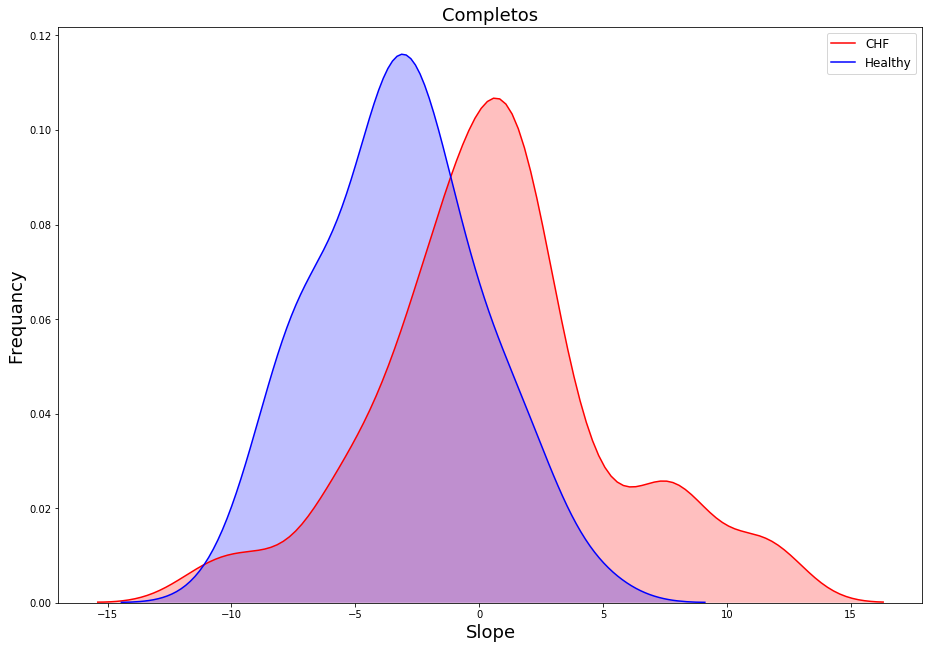

In [22]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])
p1=sns.kdeplot( dfConfgestivosCompletos['slope'] , shade=True, color="r")
p1=sns.kdeplot(dfSanosCOmpletos['slope'], shade=True, color="b")
plt.legend(['CHF','Healthy'],fontsize=12)
plt.xlabel('Slope', fontsize=18)
plt.ylabel('Frequancy', fontsize=18)
plt.title('Completos', fontsize=18)

# Sanos Despiertos

In [23]:
pathSeriesW = '/home/eric/Documents/TimeSeries/physionetDataset/SeriesPhysionet/Sanos/Dormidos y Despiertos/Series/'
X = os.listdir(pathSeriesW)
X.sort()
sanosSeriesDespiertos = [i for i in X if i[-1] == 't' and i[5] == 'w']

In [24]:
pathGraphW = '/home/eric/Documents/TimeSeries/Visibility/SanosDespiertos/'
X = os.listdir(pathGraphW)
X.sort()
sanosGraphDespiertos= [i for i in X if i[5] == 'w']

In [25]:
lst=[]
for i in range(len(sanosSeriesDespiertos)):
    
    serie = np.loadtxt(pathSeriesW+sanosSeriesDespiertos[i])
    dic = {}
    
    try:
        serie = serie[:,1]
    except:
        pass
    
    G = nx.read_edgelist(pathGraphW+sanosGraphDespiertos[i])
    try:
        G.remove_node('source')
        G.remove_node('target')
    except:
        pass
    
    deg = [G.degree(i) for i in G.nodes()]
    slope, intercept, r_value, p_value, std_err = stats.linregress(serie,deg)
    name = sanosSeriesC[i][:6]
    
    dic['name'] = name
    dic['slope'] = slope
    dic['intercept'] = intercept
    dic['r_value'] = r_value
    
    lst.append(dic)

In [26]:
dfSanosDespiertos = pd.DataFrame(lst)
dfSanosDespiertos.head()

,intercept,name,r_value,slope
0,9.167359,nsr01a,-0.003537,-0.496227
1,5.523398,nsr02a,0.039003,7.416700
2,12.171345,nsr03a,-0.035937,-5.083527
3,15.532634,nsr04a,-0.080812,-7.728145
4,6.808053,nsr05a,0.013904,2.666606


# Congestivos despietos

In [27]:
pathSeriesCW='/home/eric/Documents/TimeSeries/physionetDataset/SeriesPhysionet/Congestivos/CHF01/Dormidos y Despiertos//Series/'
X=os.listdir(pathSeriesCW)
X.sort()
congestivosSeriesW= [i for i in X if i[-1]=='t' and i[6]=='w']

In [28]:
pathSeriesCW2='/home/eric/Documents/TimeSeries/physionetDataset/SeriesPhysionet/Congestivos/CHF02/Dormidos y Despiertos//Series/'
X=os.listdir(pathSeriesCW2)
X.sort()
congestivosSeriesW2= [i for i in X if i[-1]=='t' and i[6]=='w']

In [29]:
pathGraphCW='/home/eric/Documents/TimeSeries/Visibility/CongestivosDespiertos/'
X=os.listdir(pathGraphCW)
X.sort()
congestivosGraphW=  [i for i in X if i[3]=='0']

In [30]:
pathGraphW2='/home/eric/Documents/TimeSeries/Visibility/CongestivosDespiertos/'
X=os.listdir(pathGraphW2)
X.sort()
congestivosGraphW2= [i for i in X if i[3]=='2']

In [31]:
lst=[]
for i in range(len(congestivosSeriesW)):
    
    serie = np.loadtxt(pathSeriesCW + congestivosSeriesW[i])
    dic = {}
    
    try:
        serie = serie[:,1]
    except:
        pass
    
    G = nx.read_edgelist(pathGraphCW + congestivosGraphW[i])
    try:
        G.remove_node('source')
        G.remove_node('target')
    except:
        pass
    
    deg = [G.degree(i) for i in G.nodes()]
    slope, intercept, r_value, p_value, std_err = stats.linregress(serie,deg)
    name = congestivosSeriesW[i][:7]
    
    dic['name'] = name
    dic['slope'] = slope
    dic['intercept'] = intercept
    dic['r_value'] = r_value
    
    lst.append(dic)
    
for j in range(len(congestivosSeriesW2)):
    
    serie = np.loadtxt(pathSeriesCW2 + congestivosSeriesW2[j])
    dic = {}
    
    try:
        serie = serie[:,1]
    except:
        pass
    
    G = nx.read_edgelist(pathGraphW2 + congestivosGraphW2[j])
    try:
        G.remove_node('source')
        G.remove_node('target')
    except:
        pass
    
    deg = [G.degree(i) for i in G.nodes()]
    slope, intercept, r_value, p_value, std_err = stats.linregress(serie,deg)
    name = congestivosSeriesW2[j][:7]
    
    dic['name'] = name
    dic['slope'] = slope
    dic['intercept'] = intercept
    dic['r_value'] = r_value
    
    lst.append(dic)

In [32]:
dfCongestivosDespiertos = pd.DataFrame(lst)
dfCongestivosDespiertos.head()

,intercept,name,r_value,slope
0,11.573467,chf001w,-0.019217,-3.665134
1,8.983925,chf002w,0.002083,0.351020
2,4.810585,chf004w,0.019632,5.224406
3,3.119001,chf005w,0.016394,7.914283
4,6.696207,chf007w,0.007738,1.341574


Text(0.5, 1.0, 'Despiertos')

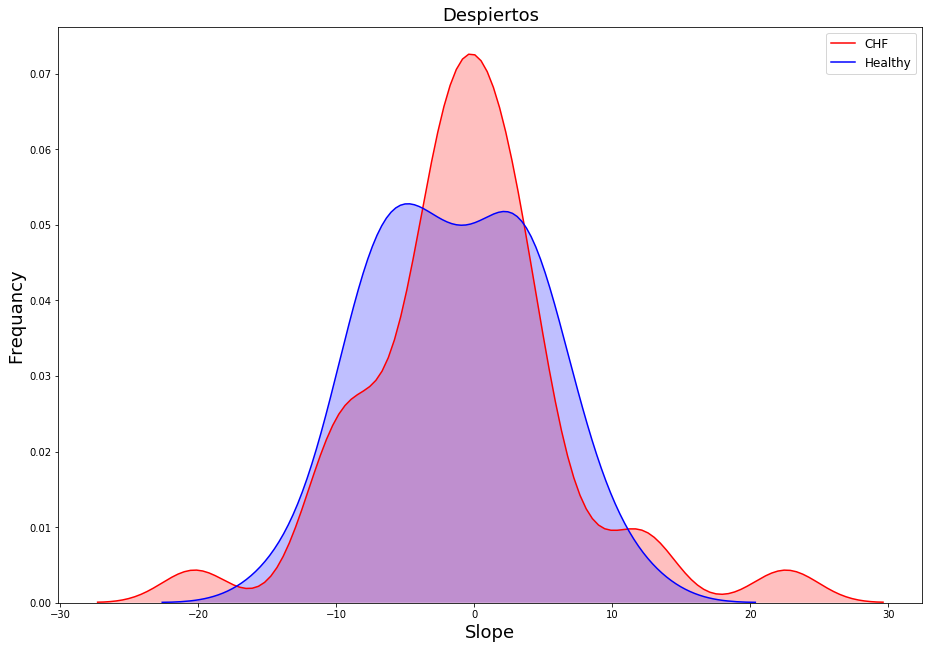

In [33]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])
p1=sns.kdeplot( dfCongestivosDespiertos['slope'] , shade=True, color="r")
p1=sns.kdeplot(dfSanosDespiertos['slope'], shade=True, color="b")
plt.legend(['CHF','Healthy'],fontsize=12)
plt.xlabel('Slope', fontsize=18)
plt.ylabel('Frequancy', fontsize=18)
plt.title('Despiertos', fontsize=18)

# Sanos Dormidos

In [2]:
pathSeriesW = '/home/eric/Documents/TimeSeries/physionetDataset/SeriesPhysionet/Sanos/Dormidos y Despiertos/Series/'
X = os.listdir(pathSeriesW)
X.sort()
sanosSeriesDormidos = [i for i in X if i[-1] == 't' and i[5] == 's']

In [3]:
pathGraphW = '/home/eric/Documents/TimeSeries/Visibility/SanosDormidos/'
X = os.listdir(pathGraphW)
X.sort()
sanosGraphDormidos= [i for i in X]

In [150]:
lst=[]
for i in range(len(sanosSeriesDormidos)):
    
    serie = np.loadtxt(pathSeriesW+sanosSeriesDormidos[i])
    dic = {}
    
    try:
        serie = serie[:,1]
    except:
        pass
    
#     G = nx.read_edgelist(pathGraphW+sanosGraphDormidos[i])
    G = SerieToNetMod(serie)
    try:
        G.remove_node('source')
        G.remove_node('target')
    except:
        pass
    
    print(sanosSeriesDormidos[i])
    deg = [G.degree(i) for i in G.nodes()]
    slope, intercept, r_value, p_value, std_err = stats.linregress(serie,deg)
    name = sanosSeriesDormidos[i][:6]
    
    dic['name'] = name
    dic['slope'] = slope
    dic['intercept'] = intercept
    dic['r_value'] = r_value
    
    lst.append(dic)
    


In [151]:
dfSanosDormidos = pd.DataFrame(lst)
dfSanosDormidos.head()

,intercept,name,r_value,slope
0,9.173481,nsr01s,0.000614,0.033931
1,-18.718988,nsr02s,0.213927,30.878605
2,-1.767557,nsr03s,0.094987,10.152342
3,1.000821,nsr04s,0.079141,6.412989
4,-2.514963,nsr05s,0.159505,10.902472


# Congestivos Dormidos

In [152]:
pathSeriesCS='/home/eric/Documents/TimeSeries/physionetDataset/SeriesPhysionet/Congestivos/CHF01/Dormidos y Despiertos//Series/'
X=os.listdir(pathSeriesCS)
X.sort()
congestivosSeriesS= [i for i in X if i[-1]=='t' and i[6]=='s']

In [153]:
pathSeriesCS2='/home/eric/Documents/TimeSeries/physionetDataset/SeriesPhysionet/Congestivos/CHF02/Dormidos y Despiertos//Series/'
X=os.listdir(pathSeriesW2)
X.sort()
congestivosSeriesS2= [i for i in X if i[-1]=='t' and i[6]=='s']

In [154]:
pathGraphCS='/home/eric/Documents/TimeSeries/Visibility/CongestivosDormidos/'
X=os.listdir(pathGraphCS)
X.sort()
congestivosGraphS =  [i for i in X if i[3]=='0']

In [155]:
pathGraphCS2='/home/eric/Documents/TimeSeries/Visibility/CongestivosDormidos/'
X=os.listdir(pathGraphCS2)
X.sort()
congestivosGraphS2 = [i for i in X if i[3]=='2']

In [ ]:
lst=[]
for i in range(len(congestivosSeriesS)):
    
    serie = np.loadtxt(pathSeriesCS + congestivosSeriesS[i])
    dic = {}
    
    try:
        serie = serie[:,1]
    except:
        pass
    
#     G = nx.read_edgelist(pathGraphCS + congestivosGraphS[i])
    G = SerieToNetMod(serie)
    try:
        G.remove_node('source')
        G.remove_node('target')
    except:
        pass
    
    deg = [G.degree(i) for i in G.nodes()]
    print(congestivosGraphS[i],congestivosSeriesS[i])
    slope, intercept, r_value, p_value, std_err = stats.linregress(serie,deg)
    name = congestivosSeriesS[i][:7]
    
    dic['name'] = name
    dic['slope'] = slope
    dic['intercept'] = intercept
    dic['r_value'] = r_value
    
    lst.append(dic)
    
    
for j in range(len(congestivosSeriesS2)):
    
    serie = np.loadtxt(pathSeriesCS2 + congestivosSeriesS2[j])
    dic = {}
    print(congestivosSeriesS2[j])
    try:
        serie = serie[:,1]
    except:
        pass
    
#     G = nx.read_edgelist(pathGraphCS2 + congestivosGraphS2[j])
    G = SerieToNetMod(serie)
    try:
        G.remove_node('source')
        G.remove_node('target')
    except:
        pass
    
    deg = [G.degree(i) for i in G.nodes()]
    slope, intercept, r_value, p_value, std_err = stats.linregress(serie,deg)
    name = congestivosSeriesS2[j][:7]
    
    dic['name'] = name
    dic['slope'] = slope
    dic['intercept'] = intercept
    dic['r_value'] = r_value
    
    lst.append(dic)

chf001s__linkList.tsv chf001s.txt
chf002s__linkList.tsv chf002s.txt
chf004s__linkList.tsv chf004s.txt
chf005s__linkList.tsv chf005s.txt


In [18]:
dfCongestivosDormidos = pd.DataFrame(lst)
dfCongestivosDormidos.head()

,intercept,name,r_value,slope
0,7.769901,chf001s,-0.002574,-0.397409
1,6.574917,chf002s,-0.012513,-0.621716
2,4.027010,chf004s,0.029281,6.164501
3,12.920556,chf005s,-0.021310,-7.948041
4,7.540255,chf006s,-0.010538,-0.676340


/home/eric/anaconda3/envs/tesina/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Dormidos')

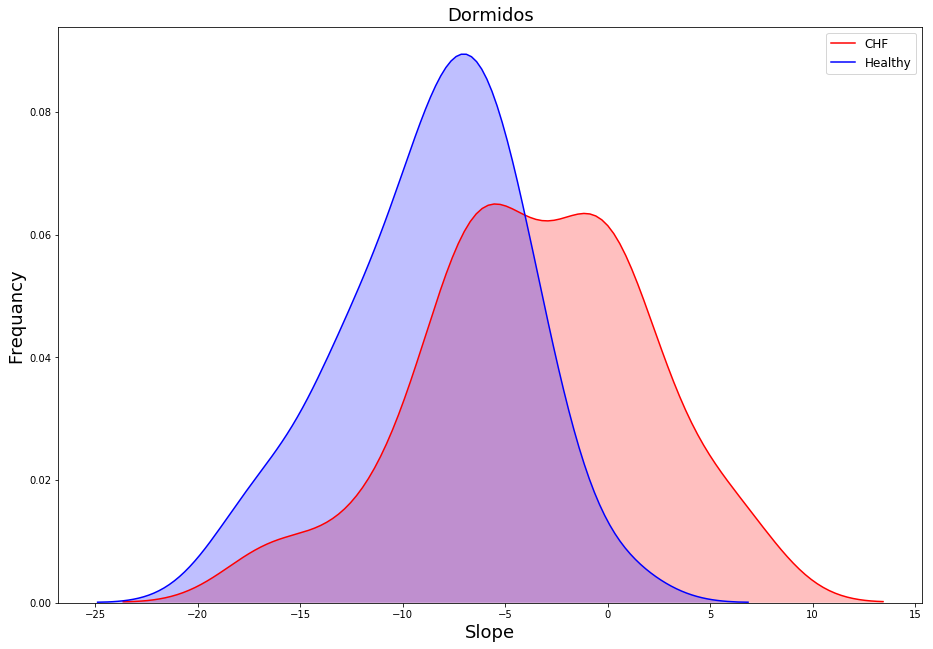

In [19]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])
p1=sns.kdeplot( dfCongestivosDormidos['slope'] , shade=True, color="r")
p1=sns.kdeplot(dfSanosDormidos['slope'], shade=True, color="b")
plt.legend(['CHF','Healthy'],fontsize=12)
plt.xlabel('Slope', fontsize=18)
plt.ylabel('Frequancy', fontsize=18)
plt.title('Dormidos', fontsize=18)

In [66]:
ff = np.random.randint(1,20,10)
G = SerieToNetMod(ff)

In [67]:
def exportGraph(G,name):
    filename=name+'_linkList.tsv'
    file=open(filename,mode='w')
    file.write('source'+'\t'+'target'+'\n')
    for link in G.edges():
        file.write(str(link[0])+'\t'+str(link[1])+'\n')
    file.close()

In [68]:
exportGraph(G,'./kdPapers/test')

In [69]:
serie = ff
try:
    serie = serie[:,1]
except:
    pass
    
G = nx.read_edgelist('./kdPapers/test_linkList.tsv')
try:
    G.remove_node('source')
    G.remove_node('target')
except:
    pass
    
deg = [G.degree(i) for i in G.nodes()]
slope, intercept, r_value, p_value, std_err = stats.linregress(serie,deg)


/home/eric/anaconda3/envs/tesina/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


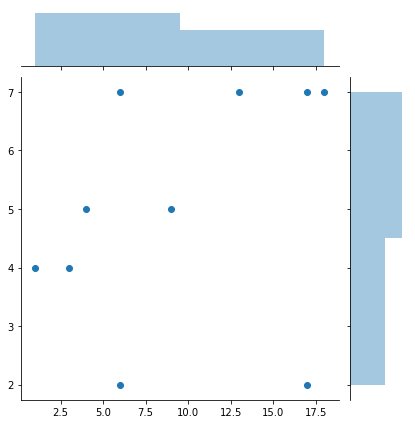

In [70]:
p1=sns.jointplot(x=serie, y=deg, kind='scatter')

<StemContainer object of 3 artists>

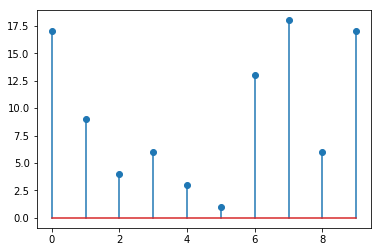

In [71]:
plt.stem(serie)

In [142]:
dg = G.degree()

In [148]:
G.nodes()

NodeView(('0', '1', '2', '14', '18', '3', '4', '5', '6', '8', '11', '12', '7', '9', '10', '13', '15', '16', '17', '19', '20', '21', '27', '31', '36', '45', '46', '48', '22', '25', '23', '24', '26', '28', '29', '30', '32', '33', '35', '34', '37', '38', '39', '44', '40', '41', '42', '43', '47', '49', '50', '53', '55', '57', '70', '71', '72', '73', '74', '75', '76', '142', '51', '52', '54', '56', '58', '59', '60', '61', '62', '69', '63', '66', '68', '64', '65', '67', '77', '86', '87', '93', '94', '95', '97', '117', '140', '141', '78', '79', '80', '81', '82', '83', '85', '84', '88', '89', '91', '92', '90', '96', '98', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '99', '102', '105', '100', '101', '103', '104', '118', '121', '122', '123', '139', '119', '120', '124', '127', '138', '125', '126', '128', '129', '130', '131', '136', '137', '132', '134', '133', '135', '143', '144', '145', '146', '148', '149', '160', '161', '183', '184', '185', '186', '187', '188', '

In [ ]:
for node in G.nodes():
    